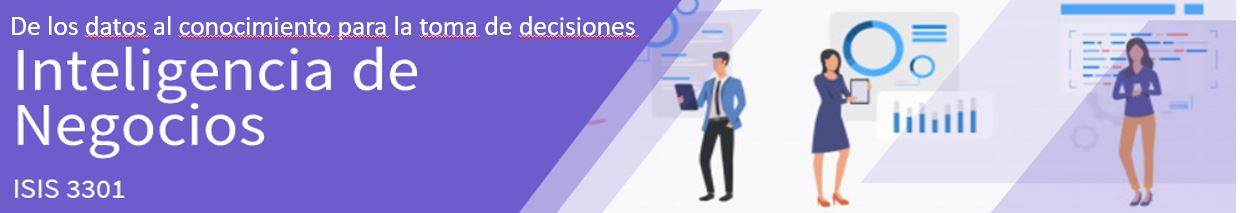

ESTUDIANTES:
-Estudiante 1: Juan Felipe Garcia
-Estudiante 2: Samuel Freire
-Estudiante 3: Lucciano Franco

# 1 Carga de librerias

In [1]:
%pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator,TransformerMixin


import scipy.stats as stats


# 2. Carga de Datos

In [3]:
df_pc=pd.read_csv('./202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv',sep=",", encoding = "ISO-8859-1")

# 3.Entendimiento de los datos

In [4]:
df_pc.shape

(1216, 14)

In [5]:
df_pc.head()

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows


In [6]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1216 non-null   int64  
 1   Company      1216 non-null   object 
 2   TypeName     1216 non-null   object 
 3   Ram          1216 non-null   int64  
 4   Weight       1193 non-null   float64
 5   Price        1201 non-null   float64
 6   TouchScreen  1216 non-null   int64  
 7   Ips          1216 non-null   int64  
 8   Ppi          1204 non-null   float64
 9   Cpu_brand    1216 non-null   object 
 10  HDD          1200 non-null   float64
 11  SSD          1216 non-null   int64  
 12  Gpu_brand    1216 non-null   object 
 13  Os           1216 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 133.1+ KB


Como poemos ver en este caso encontramos una descripcion del tipo de filas encontradas en el archivo de datos inicial. Luego, para este caso vamso a habalr de los tipos referentes a lo estudiado en el curso. Para este punot, tenemos las columnas de tipo numerico. Luego, tenemos las de tipo categorica. Dentro de esta categoria tenemos dos tipos, las nominales y las que mantiene las variables categoricas. Para este caso, serai necesario recordar que las variables numericas, son auqellas que nos permiten tener unos datos puros utiles para lograr realizar las predicciones. Luego para el caso de las variables categoricas, son auqellas que lo mas probalbes, es que necesiten transofrmaciones para lograr utilizarlas en los modelos

In [7]:
df_pc.describe()

,id,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1216.000000,1216.000000,1193.000000,1201.000000,1216.000000,1216.000000,1204.000000,1200.000000,1216.000000
mean,637.925164,8.458882,2.401572,13.114402,0.145559,0.285362,183.830716,441.218800,187.529605
std,367.482876,5.094332,4.844791,28.659102,0.352809,0.451772,449.708876,927.052855,186.902926
min,0.000000,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,319.750000,4.000000,1.500000,10.403650,0.000000,0.000000,127.335675,0.000000,0.000000
50%,638.500000,8.000000,2.040000,10.882316,0.000000,0.000000,141.211998,0.000000,256.000000
75%,954.250000,8.000000,2.320000,11.288115,0.000000,1.000000,157.350512,1000.000000,256.000000
max,1272.000000,64.000000,97.729949,499.766079,1.000000,1.000000,7328.468865,24127.543112,1024.000000


En este caso, encontramos una descripcion sobre las variables numericas que se encontraron almacenadas en el arhivo inicial. Para este caso podemos encontrar, la catnidad de datos qeu existen de cada columna. Para este caso, la columna qeu mas datos tiene es la columna idd, Ram, Ips, TouchScreen, SSD. Luegol, para estas columnas se pued denotar que tiene la totalidad de datos. Luego para el resto de columnas numericas, se puede ver que varian la catnidad de datos que tienen. Luego, siguiendo con este analisis encontramso el valor de el promedio. En este caso, se entiende qeu se presenten diveross promedios y desbalanceaos entre si dado qeu no todas las columnas se encuntran en el mismo rango de valores. Luego, otro valor importante para este analisis, seguimos con la desviacion estandar, que para aclarar es la  desviacion promedio de los valores con respectoa su promedio. Para este caso, podemos encontrar la misma idea del proomedio, donde pueden haber muy grandes u muy pequeñs desviacion, por la misma idea de la variedad de los rangos de las variables. En este caso pdoemso ver que la columna que mas desviacion estandar tiene es la columna de HDD. Luego, en este analisi encontramso una varaible o un punto muy importante y es el valor minimo. Para este caso, esta calsificacion va a seguir una idea muy realista sobre lo qeu que s encuentra. En este punto encontramso que el valor minimo de varias columnas , es el 0. Luego encotnramso los percentiles para cada columna. EN este caso, no se va adetallar muhco, sino solo la idea del percentil. En este cao, los percentiles significan cuantos datos o que numero representa la cantidad del porcentaje. EN el caso del, percentil 25, de la columna RAm, se puede decir, que el 25% es reprwsentado por el alor 4, es decir que el 4 es el numero que delimita este prcetil, esto va suceder para cad uno de ellos. Luego para el caso del maximo, resulta inetersante mencioanr que la columna con mayor valor es la columna de HDD, algo que sigue con la misma ddiea de que no todas las vairable estan enh el mismo rango de numeros.

In [8]:
df_pc.dtypes

id               int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD            float64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

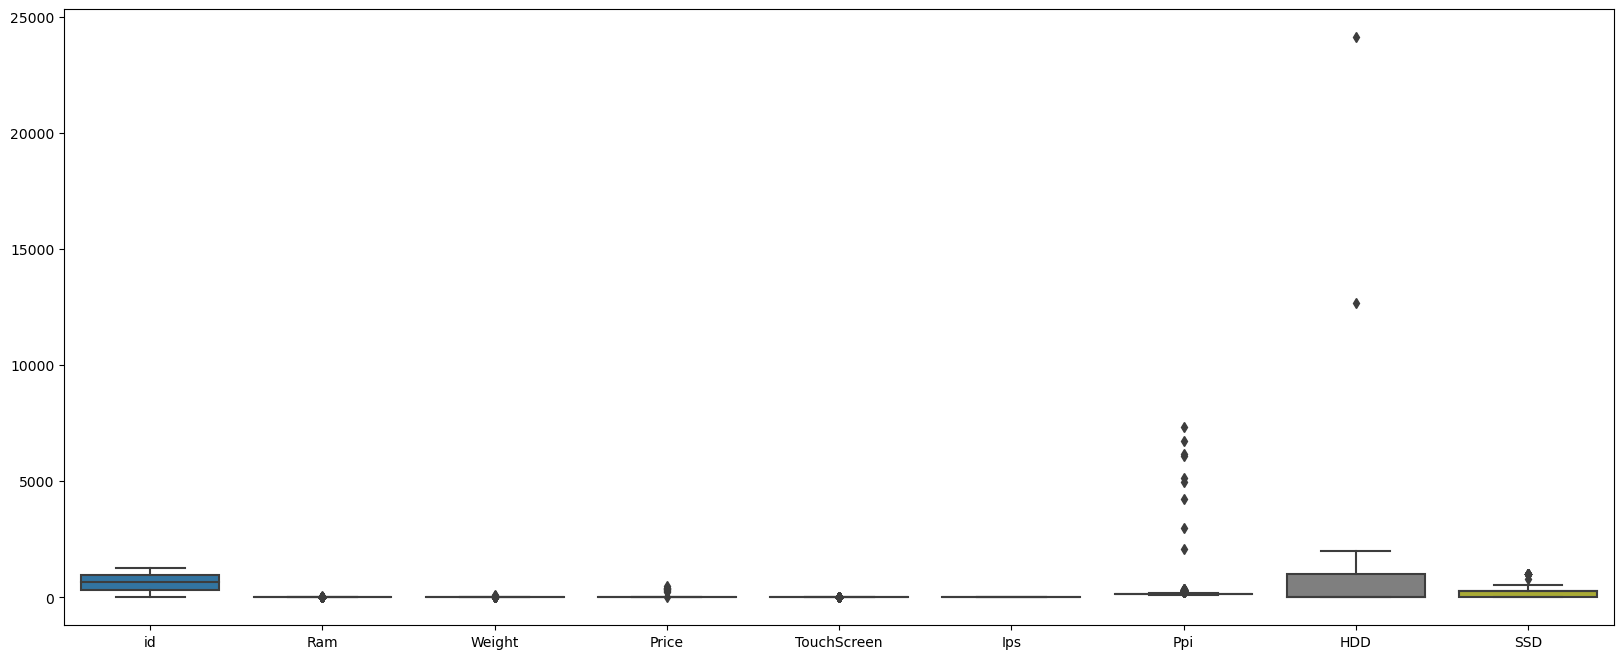

In [9]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_pc, orient="v")

En este caso, poddemso ver que no existe niguna variable que tenga un dominio exorbitante que pueda legar a nublar los analisis a realizar. Sin embargo, vemso qeu sucede en las columnas id, HDD, o SSD. La scuales prsentan los rango, maoyres, sin lklegar a ser tan desbalanceados como los demas.

In [10]:
name_cols_float = df_pc.select_dtypes(include = ['float']).columns
name_cols_int = df_pc.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['id', 'Ram', 'TouchScreen', 'Ips', 'SSD'], dtype='object')

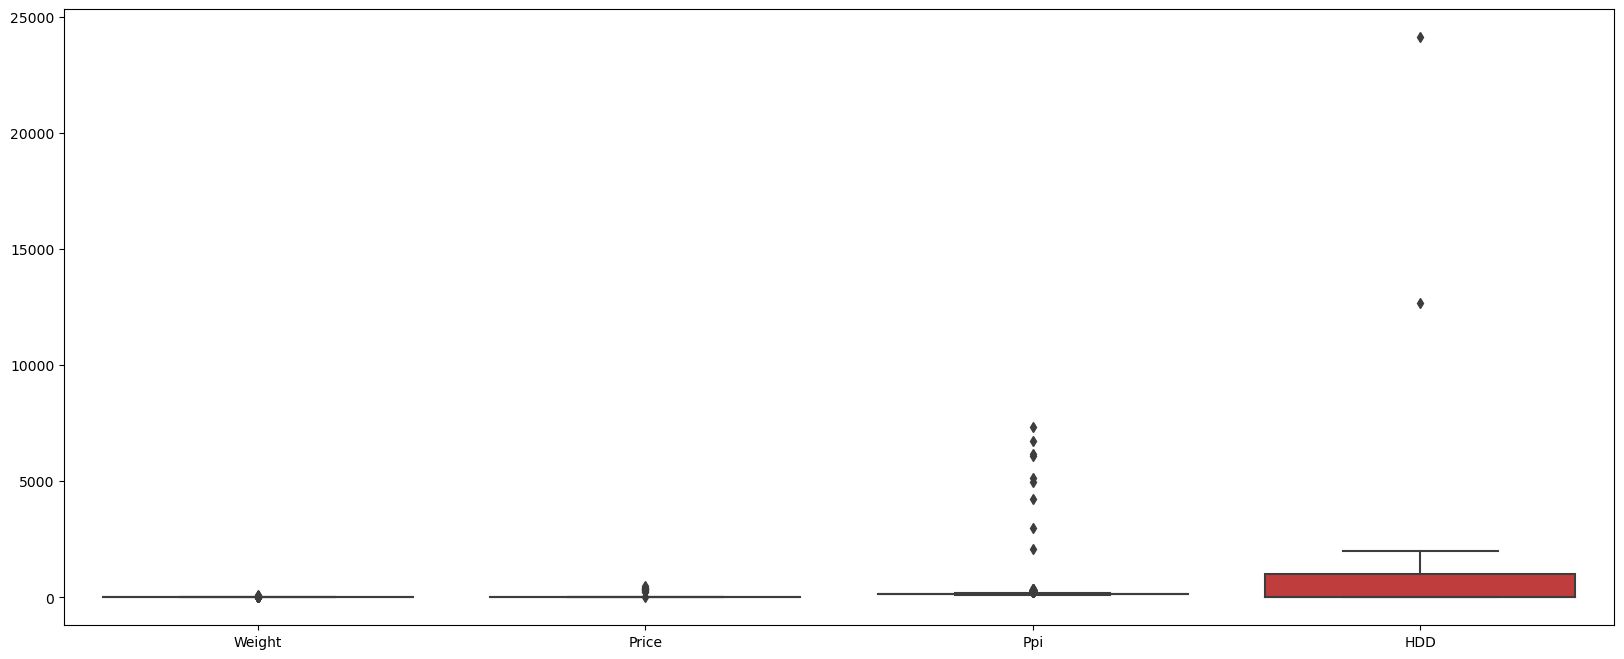

In [11]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_pc[name_cols_float], orient="v")

En este caso, podemos ver que no existe niguna variable que tenga un dominio exorbitante del tipo de float que pueda legar a nublar los analisis a realizar. Sin embargo, vemso qeu sucede en la columna HDD. La scuales prsentan los rango, maoyres, sin lklegar a ser tan desbalanceados como los demas.

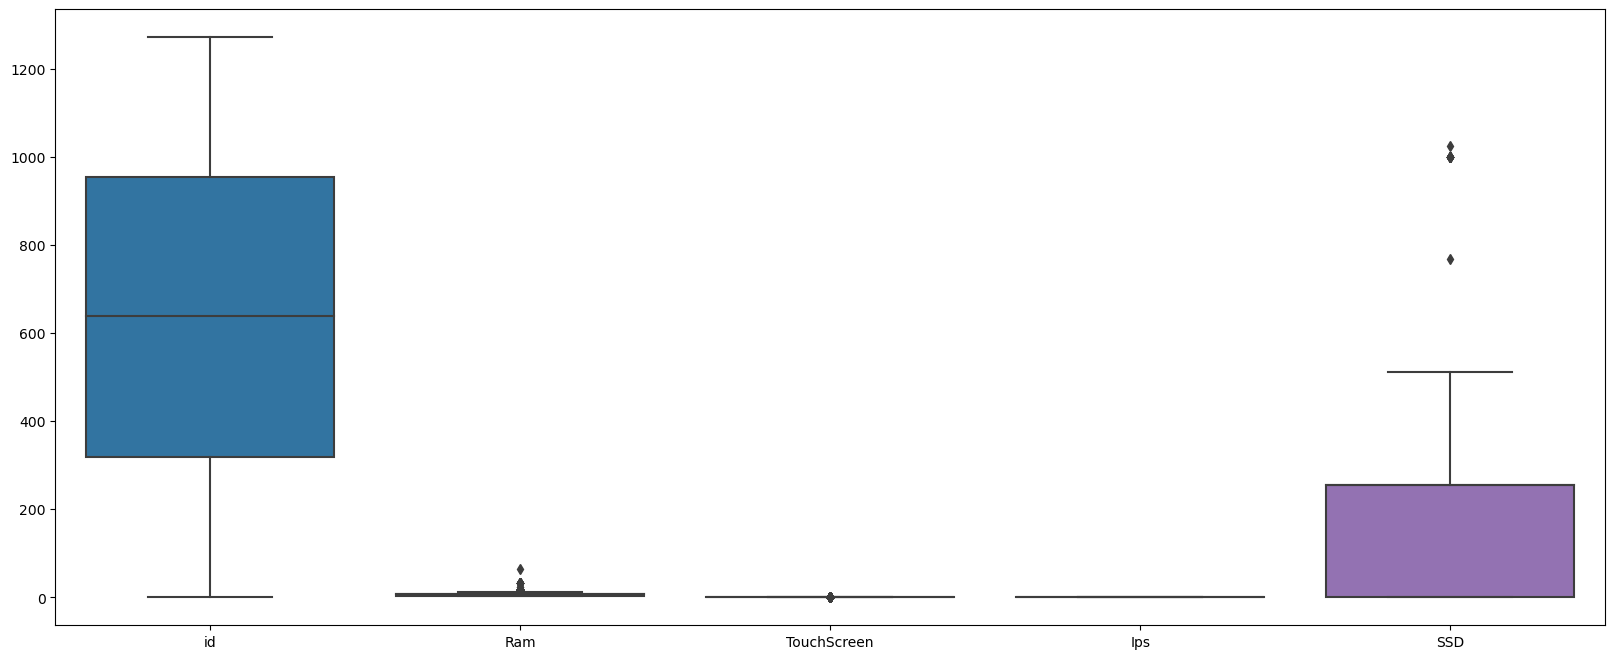

In [12]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_pc[name_cols_int], orient="v")

En este caso, podemos ver que no existe niguna variable que tenga un dominio exorbitante que pueda legar a nublar los analisis a realizar en el caso de las oclumasnd e tipo int. Sin embargo, vemso qeu sucede en la columna ID, SDD. La scuales prsentan los rango, maoyres, sin llegar a ser tan desbalanceados como los demas. EN este caso, si seria necesario analizar la posibilidad de no tomar la columna id o la columna SDD

In [13]:
name_cols_non_number = df_pc.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype='object')

In [14]:
df_pc[name_cols_non_number].describe()

,Company,TypeName,Cpu_brand,Gpu_brand,Os
count,1216,1216,1216,1216,1216
unique,19,13,5,9,3
top,Lenovo,Notebook,Intel Core i7,Intel,Windows
freq,281,656,497,662,1049


Para este cao, como se realizo con las columnas de tipo numerico, tambien es necesario realizar un anilsisi o entedmineitno sobre las varaibles de tipo categorico. En este caso, encontramso un analisis de un estilo mas cualitativo por se esperaria al no poder realziar un analisis estadistico. Para este caso se va a estudiar la cantidad e datos qeu se encontraron de cada columna. Luego, se va a analizar la catnidad e valores unicos que contro el estudio. Luego, se va analsis el valor que mas aparece, y por ultimo se va a nalais la frecuencia con la que qaprece este valor que mas aparece. Para empezar con este analiis es necesrio decir que la columna que todas la soclumnas, como se puede esperar, cumplan con todos los datos a su completitud. Todas las columnas se encontraron con valores de 1216, o cantidad de datos. Luego, para el caso de los valores unicos, para este caso si ya vario, como se puee esperar. Para este caso, la columna con valor unicos es la columna de tipo o llamda Company. Esto claramente, habla de la variedad de compañias qeu vende sus omputadores en el mercado. Luego, al hablar de los valores topo de cada columna enotramso lo siguiente. Para el caso de la columna Company, se encontro que su valor de mayro freecuancia, con 281 aparciones es Lenovo. Luego, para el caso de la columna TypeName el valor con mas aparciones fue Notebook, con 656 aparciones. Leugo, para la column a Cpu_Branfe, fue Intel Core i7, con 497 aparciones. Luego, para la columna Gpu_Brand fue Intel, con 662 aparciones. Y por utlimo, para la columan OS, que hace referencia al aisstema operativo, el valor que mas aparecio fue Windows, con 1049 aparciones sinedo este el valor con mas aparciones de todas als columnas. 

In [15]:
df_pc.Ram.value_counts()

8     583
4     350
16    192
6      33
12     25
32     16
2      14
24      2
64      1
Name: Ram, dtype: int64

Este punto se puede la tendencia de los componnetes de Ram de los computaodres recolectados, los cuales tienden a ser de 8 de ram. Sineod este un estandar en el mercado de computadores, añl ser la mas accesible para los compradores.

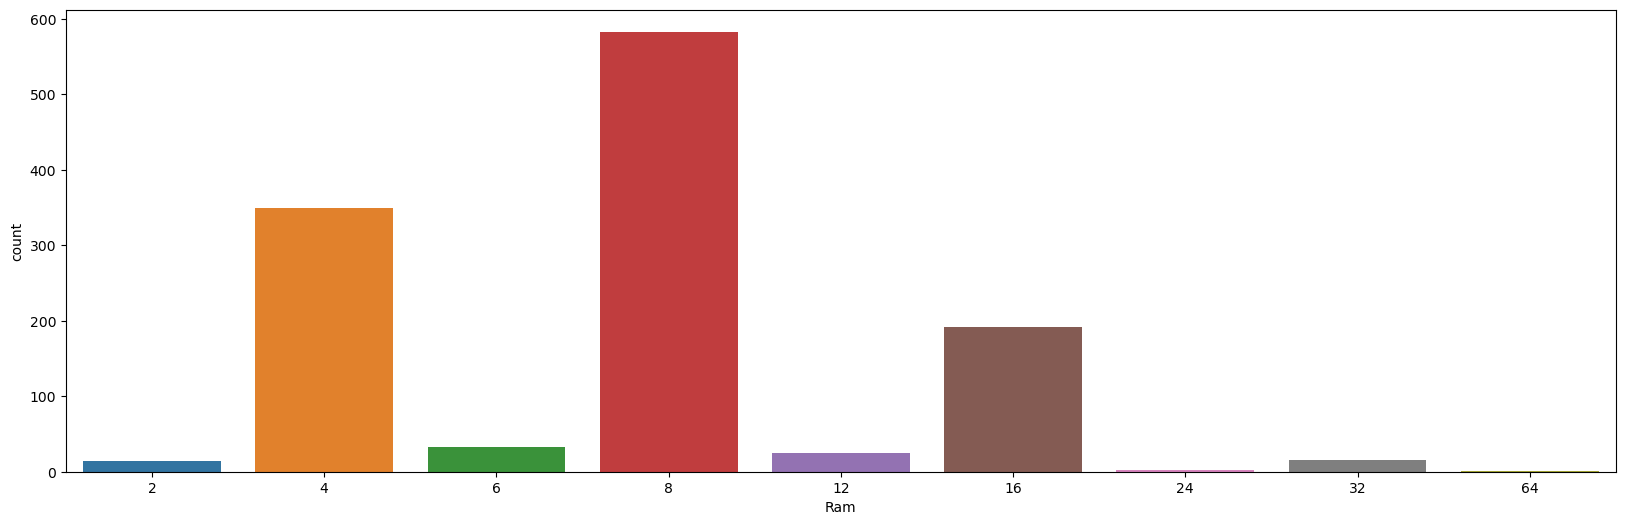

In [16]:
plt.figure(figsize=(20, 6))  
ax = sns.countplot(x='Ram', data=df_pc)

Aqui se puede ver de manera mas visual lo  mensionado anteriormente referenciado a las ram y su variedad en el mercado.

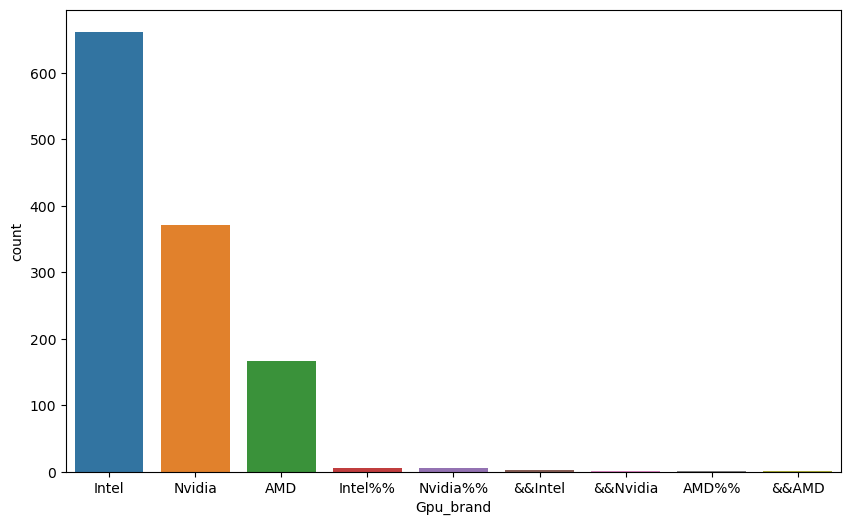

In [17]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='Gpu_brand', data=df_pc)

Aqui podemos, ver visualmente una tendencia del mercado a tener de compañia de Gpu, a intel. Siendo esto algo muy recurrente ya que, es la emrpesa con mayor trayectoria en cuanto este toopico se habla, por lo que se esperaria quye fuera l marca que marca la pauta en este tipo de rubro.

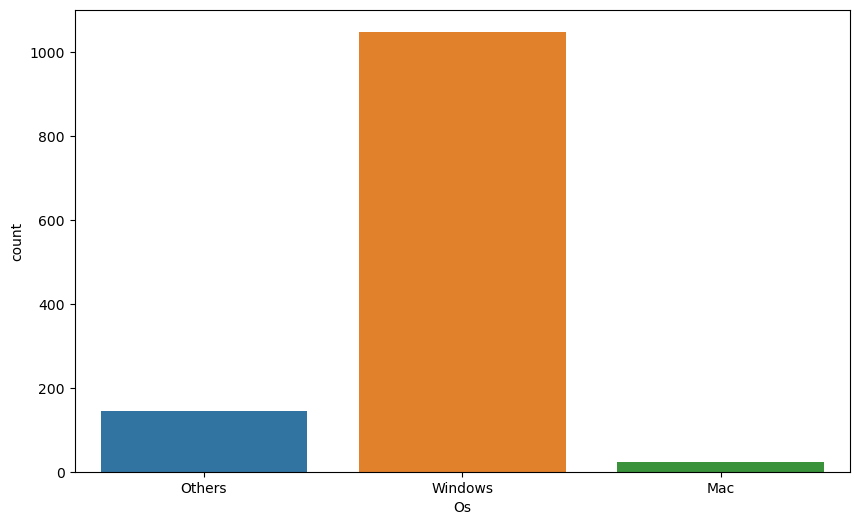

In [18]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='Os', data=df_pc)

Aqui podemos encontrar, visualment,e otro facotr muy recurrente en cuanto al mercado de computadores. El cual, es que windows al ser el mas variado tiene la mayor catnidad de productos usando sus sistemas operativo. Esto se de a las tendencias del mercado a no usar tanto MAC, o Linux, sino a que la maoyria de compañias tiene convenios de años con windows.

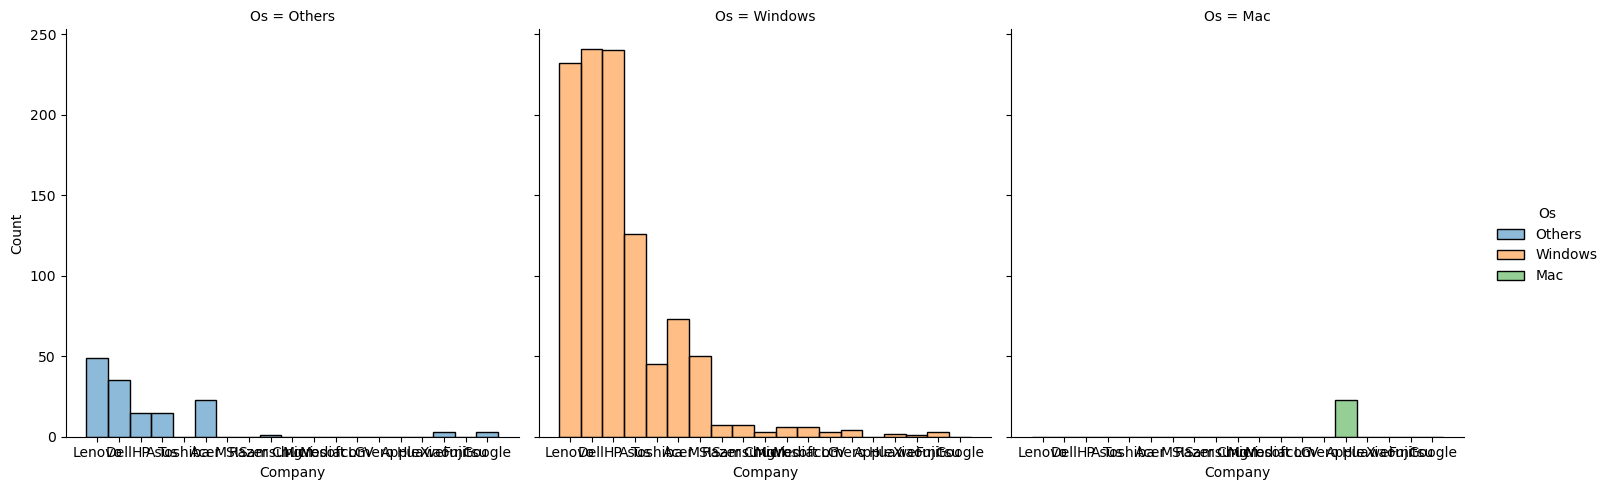

In [19]:

sns.displot(data=df_pc, x="Company", hue="Os", col="Os")

Aqui podemos ver de manera mas visual, la conlusion anterior, de convenios en cuanto a sistemas operativos. Como se puede ver windows tiene los mayores convenios con las marcas. Por otro lado, Mac solo tiene de productor a apple. SIneod esto por temas de su ambiente cerrado

In [20]:
cols_select=["Price","Ram","Weight", "SSD"]
df_pc_cols_sels=df_pc[cols_select].copy()

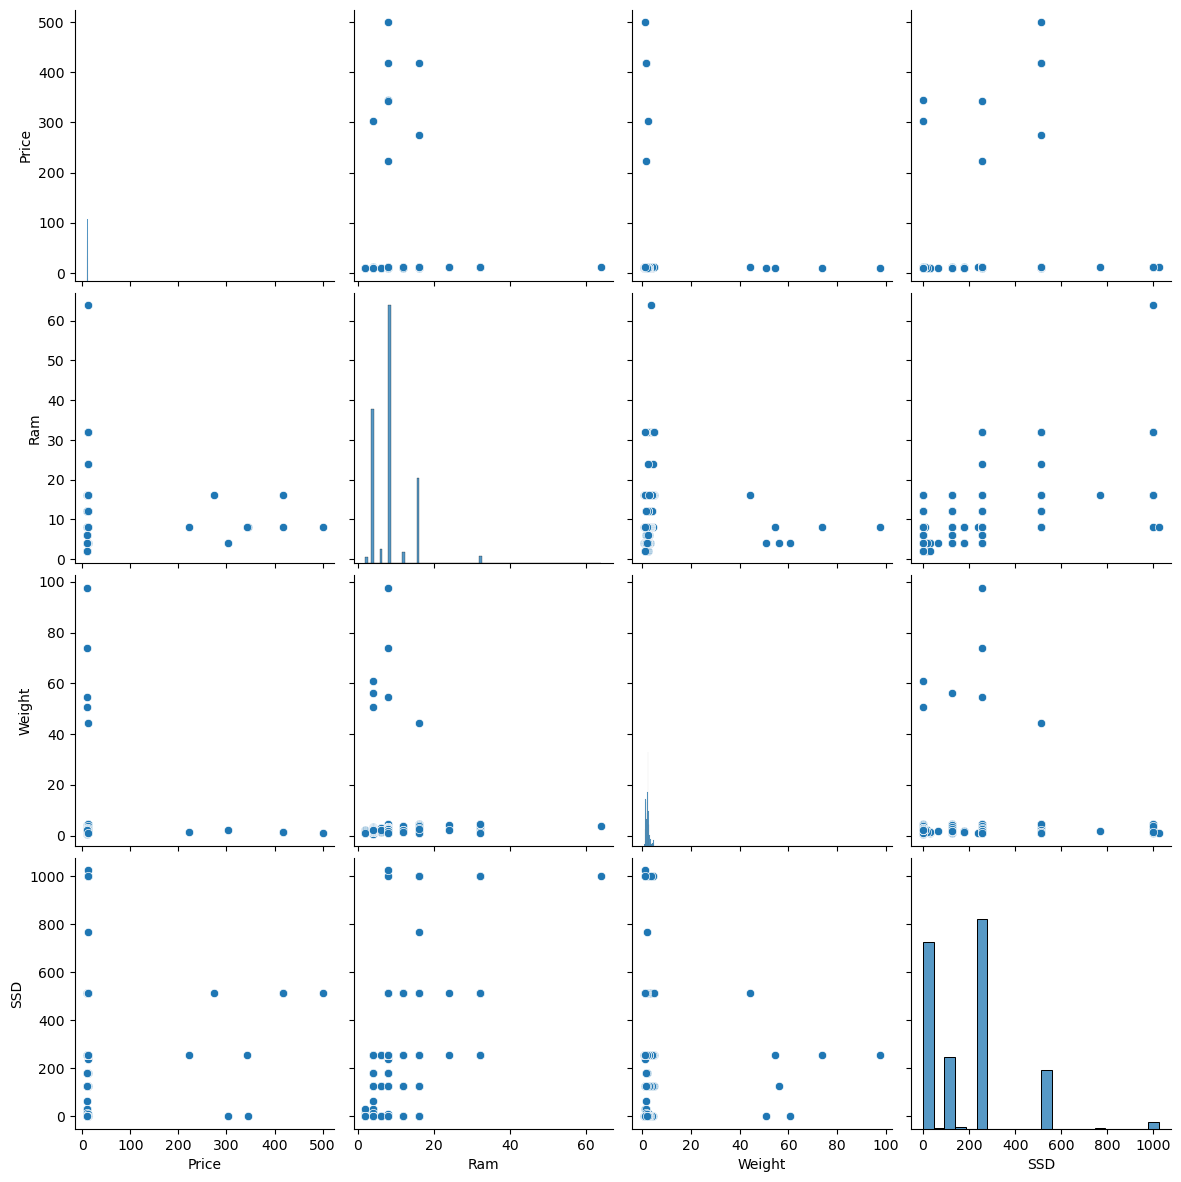

In [21]:
sns.pairplot(df_pc_cols_sels, height=3,kind='scatter')

En este caso, se quiere mostrar de manera visual la relacion entre las columnas numericas, que tienden a sñlas mas entendibles en cuanto un desglose de tipo estadistico. Como se puede ver se seleccionaron las columnas Price, Ram, Weight y SSD. Como se puede ver existe una variedadd muy alta de realciones entre estas , por lo qeu resultan buenos punto sde partida si se quiere realizar este tipo de analisis.

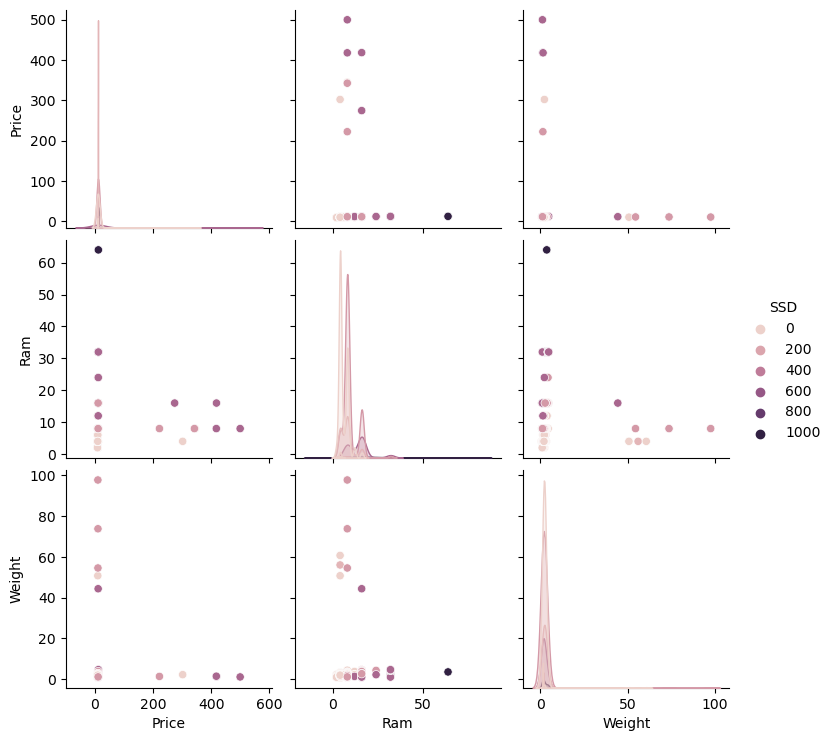

In [22]:
sns.pairplot(data=df_pc_cols_sels, hue="SSD")

En este caso, se quiere realizar otra visualizacion de ujn toipo mas especifico, y en este caso se esocgio la columna SSD para realizar una relacion tridimnesional con el resto de variables ya seleccionadas. CVOn esto se espera escoger de mejor maenra  para el analisi futuro que se va a realizar.

### 3.1 Entendimiento de los datos

**Análisis** 
1. Id no aparece nombrada en el diccionario, debido a esto en vez puede ser candidata a ser eliminada.
2. Existen columnas que no tienen el tipo apropiado por lo que tienen que ser revisadas y cambiadas.
3. Id no aparece nombrada en el diccionario, debido a esto en vez puede ser candidata a ser eliminada.




La columna describe deberia ser int no deberia tener ningun float por lo que al hacer describe en esta columna nos damos cuenta que el maximo es un numero float por lo que es necesario eliminar estos datos o cambiarlos por un valor estandar

In [23]:
df_pc["HDD"].describe()

count     1200.000000
mean       441.218800
std        927.052855
min          0.000000
25%          0.000000
50%          0.000000
75%       1000.000000
max      24127.543112
Name: HDD, dtype: float64

In [24]:
df_pc.describe()

,id,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1216.000000,1216.000000,1193.000000,1201.000000,1216.000000,1216.000000,1204.000000,1200.000000,1216.000000
mean,637.925164,8.458882,2.401572,13.114402,0.145559,0.285362,183.830716,441.218800,187.529605
std,367.482876,5.094332,4.844791,28.659102,0.352809,0.451772,449.708876,927.052855,186.902926
min,0.000000,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,319.750000,4.000000,1.500000,10.403650,0.000000,0.000000,127.335675,0.000000,0.000000
50%,638.500000,8.000000,2.040000,10.882316,0.000000,0.000000,141.211998,0.000000,256.000000
75%,954.250000,8.000000,2.320000,11.288115,0.000000,1.000000,157.350512,1000.000000,256.000000
max,1272.000000,64.000000,97.729949,499.766079,1.000000,1.000000,7328.468865,24127.543112,1024.000000


In [25]:
#Consulto una muestra de datos para analizarlos mejor
df_pc.sample(15)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
292,319,Acer,Notebook,4,1.40,10.159710,0,0,135.094211,Other Intel Processor,0.0,0,Intel,Windows
752,540,Dell,Ultrabook,8,1.20,11.219074,1,0,276.053530,Intel Core i7,0.0,256,Intel,Windows
592,760,Lenovo,Gaming,8,2.50,10.930200,0,1,141.211998,Intel Core i7,1000.0,128,Nvidia,Windows
444,461,Acer,Netbook,4,1.40,10.050907,0,0,135.094211,Other Intel Processor,0.0,128,Intel,Windows
621,296,Acer,Notebook,8,2.50,10.862093,0,0,141.211998,Intel Core i7,0.0,256,Nvidia,Others
462,201,Lenovo,Notebook,4,2.10,10.176070,0,0,100.454670,Intel Core i5,0.0,128,Intel,Windows
565,1166,Lenovo,Notebook,8,1.95,11.212620,0,1,141.211998,Intel Core i5,0.0,256,Intel,Windows
365,842,HP,Notebook,8,2.63,10.789006,0,0,106.113062,Intel Core i5,1000.0,0,Nvidia,Windows
307,534,Asus,Gaming,8,2.30,11.383485,0,1,141.211998,Intel Core i5,1000.0,128,Nvidia,Windows
369,1143,HP,Workstation,8,2.59,11.684869,0,1,141.211998,Intel Core i7,0.0,256,Nvidia,Windows


In [26]:
df_pc["Cpu_brand"].value_counts()

Intel Core i7            497
Intel Core i5            403
Other Intel Processor    131
Intel Core i3            127
AMD Processor             58
Name: Cpu_brand, dtype: int64

### 3.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [27]:
# Cálculo de porcentaje de valores nulos por columna
((df_pc.isnull().sum()/df_pc.shape[0])).sort_values(ascending=False)

Weight         0.018914
HDD            0.013158
Price          0.012336
Ppi            0.009868
id             0.000000
Company        0.000000
TypeName       0.000000
Ram            0.000000
TouchScreen    0.000000
Ips            0.000000
Cpu_brand      0.000000
SSD            0.000000
Gpu_brand      0.000000
Os             0.000000
dtype: float64

Como se puede en este anlsisi de compleitud. El cual busca identificar porcentajes de valores nulos en una columna con respecto a la totalidad de la columna. Eso tcon el find edefinri que realizar con estos valores nulos. En este caso podemos ver que realmente, las columnas tiene un porcentaje de compleitud muy alto. O si se quiere ver como esta reprsentado tiene una procentaj de nulidad muy bajo. Esot lo hace ideal pra realziar un analisis, luego se va adefinri la estregia con los valores nulos.

### 3.2.2 Unicidad

In [28]:
df_pc.duplicated(keep = False).sum()

10

In [29]:

df_pc["id"].duplicated(keep = False).sum()


10

En este caso existen valores duplicados, en tconst existen valores duplicados lo cual no tendria que suceder ya que este es el ID de cada uno de los datos por lo que es un claro candidato a ser eliminado. 

Aparte de esto existen 10 filas duplicadas por lo que estas seran candidatas para se eliminadas al ser un numero muy pequeño.

Ademas en este punto cabe aclarar, qeu realmente, solo en la columna id, no tiene sentido que existan repetidos. Esto porque el resto de columnas se tnenderia que existan valore reptidos, ya qeu puede estar hablano de una compañia lo que generari que si existieran varios iguales.

### 3.2.3 Consistencia

In [30]:
df_pc.dtypes

id               int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD            float64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

Existen columnas que tienen tipo incorrecto como lo son TouchScreen e Ips que deberian ser booleanos y tambien a esto se le suma HDD que deberia ser entero pero aparece como float

In [31]:
df_pc["TouchScreen"].describe()

count    1216.000000
mean        0.145559
std         0.352809
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TouchScreen, dtype: float64

Ambas columnas son 0 o 1 por lo que se puede hacer una transicion de enteros a booleanos bastante sencilla 

In [32]:

df_pc["Gpu_brand"].value_counts()

Intel       662
Nvidia      371
AMD         166
Intel%%       6
Nvidia%%      6
&&Intel       2
&&Nvidia      1
AMD%%         1
&&AMD         1
Name: Gpu_brand, dtype: int64

In [33]:
df_pc["Gpu_brand"].value_counts()

Intel       662
Nvidia      371
AMD         166
Intel%%       6
Nvidia%%      6
&&Intel       2
&&Nvidia      1
AMD%%         1
&&AMD         1
Name: Gpu_brand, dtype: int64

Las marcas de la Gpu_brand estan mal por lo que tienen que ser ajustadas, unicamente deberian existir 3 marcas

In [34]:
df_pc["TypeName"].value_counts()

Notebook                656
Gaming                  189
Ultrabook               187
2 in 1 Convertible      109
Workstation              29
Netbook                  21
Notebook%%                9
&&Notebook                5
Gaming%%                  4
&&Gaming                  3
&&2 in 1 Convertible      2
2 in 1 Convertible%%      1
&&Ultrabook               1
Name: TypeName, dtype: int64

Del mismo modo sucede con TypeName por lo que esto tambien tiene que ser ajustado

### 3.2.4 Validez

EN este caso, se consider que todas las columnas cumplen con sus valores, para qeu en el analisis puedan ser tendias en cuenta. Niguna tiene valores iguales en todsos su regiustros por lo que seria inncesario retirr una columna por estas razones. Asi que en el punto de validez se cree que todas las cumplen como candidatas por esta propiedad para ser tenidas en cuenta.

### 3.3 Manipulacion de datos

### 3.3.1 Prepara datos


Hay filas con atributos que no coinciden con el tipo de diccionario debido a esto deben ser cambiados


Existen valores NaN en la columna de peso por lo que para mayor facilidad en el futuro se decidio remplazar estos valores con la media de la columna

Cabe aclarar que existen varias columnas la cuales urgen e ser modifcadas o transformada para que puedan ser legibles y pode rrealziar una nalsisi total

#### 3.3.1.1 Seleccion de variables

In [35]:
features= ["Weight","Price","Ppi","HDD","Ram"]

Para este caso se escogieron las varialbes Weight, Price, Ppi, HDD, Ram. Realmente en este punto, no se ha realizado nignun analsisi estadistico o matematico profundo para realizar esta seleccion. Esta eelccion se deb mas a un idea de analsiis caluatitvo, de que estas variables pueden llegar a ser suceptibles de lograr una mayor relacion para lograr generalizar o predecir la funcion objetivo que mas adelnate se va hablar. En este caso, cada una de ellaas, se considero que represetna un facotr importante en lo que puede llegar a ser un facotr para la definicion del rpecio de un o de los productos que se mensionan en las columnas

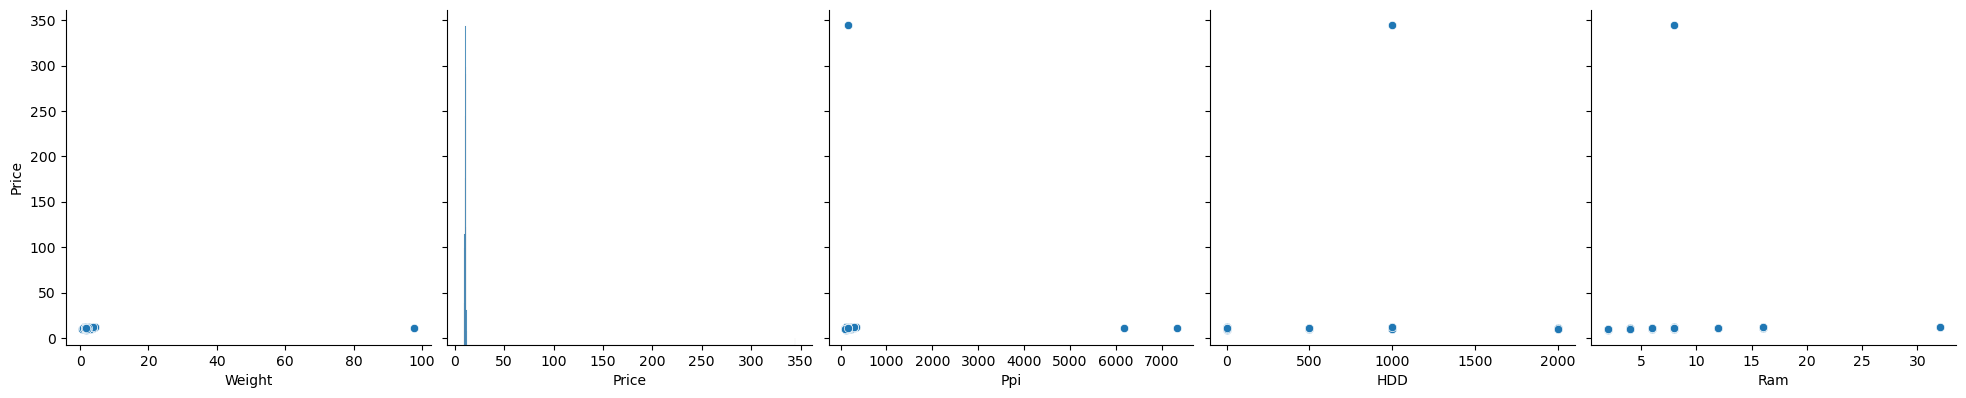

In [36]:
sns.pairplot(df_pc.sample(frac=0.2),height=4,y_vars="Price",x_vars=features)

En este puntos, se quiere realziar una visualizacion de la realzcion que tiene cada una de las variables anteriores, con la principal que es Price. En set caso, se puede ver en todas se puede ver una vaeirdady una relacion correcta con respecto a lo querido.

Quitar datos duplicados de id:

In [37]:
df_pc["id"].duplicated(keep = False).sum()

10

In [38]:
df_pc.duplicated(subset=["id"]).sum()

6

In [39]:
df_pc

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,Intel,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,Intel,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,Intel,Windows


Quitar NaN

In [40]:

class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy.drop_duplicates(subset=['id'], inplace=True)
        return X_copy

En este caso, se retiraron los duiplicados y se creo uyna funcion apra que se automtize este proceso. Especifamente, como se habia hablado los duplicados importantews a retirar se encuntran en la columna id, como se puede ver en la funcion.

In [41]:

class ClipColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Ppi'] = X_copy['Ppi'].clip(lower=0, upper=400)
        X_copy['Price'] = X_copy['Price'].clip(lower=0, upper=14)
        X_copy['Ram'] = X_copy['Ram'].clip(lower=0, upper=32)
        X_copy['Weight'] = X_copy['Weight'].clip(lower=0.1, upper=7)
        X_copy['HDD'] = X_copy['HDD'].clip(lower=0, upper=4000)
        return X_copy


Para es caso, se realiza esta estadndrizacion, si se quiesar adecir, y es que se espera que todos los valores dae la columna qeuden dentro unos rangos defindios para que su analsisi sea mejor. P0ara este caso, se espciefcio unos rangos para las columnas Ppi, Price, Ram, Weight, HDD. Recoradno qeu esto nos va a aportar que el modelo quede mas consolidado y mas balanceado.

In [42]:

class HandleNaN(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        promedio = X_copy['Price'].mean()
        X_copy['Price'].fillna(promedio, inplace=True)
        promedio = X_copy['Weight'].mean()
        X_copy['Weight'].fillna(promedio, inplace=True)
        promedio = X_copy['Ppi'].mean()
        X_copy['Ppi'].fillna(promedio, inplace=True)
        promedio = X_copy['HDD'].mean()
        X_copy['HDD'].fillna(promedio, inplace=True)
        return X_copy

En este punto, se manejna los nulos, detras de esta trasnforamacion no existe tanto problema, sino que se espera quitar los nulos sobre las columnas seleccionass antes: Prioce, Ppi, Ram, Weight, y HDD.

In [43]:

class ReplaceGPUBrand(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Gpu_brand'] = X_copy['Gpu_brand'].str.replace('&&', '').str.replace('%%', '')
        return X_copy

En este punto se busca corregir un eror ya mencionado y es qeu se debe corregir la variedad de nombres mal escrito en la co9lumna de tipo GPU_brand, y que todo qeu con los mismo valroes apra poder orgnanizar emjor la informacion

In [44]:
class MapGPUBrand(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Gpu_brand'] = X_copy['Gpu_brand'].map({
            'Intel': 0,
            'Nvidia': 0.5,
            'AMD': 1
        })
        return X_copy
    


Para este punto, lo que se busca es luego, de haber trasnofrmado la columna GPU_Brand, se espera estandrizarlas o pasaral a vlor numerico. Esto con la idea, de qque los mdoelso respondan de mjeo rmanera, sabiendo qeu se sacrifica la diferenciacion, y se asume el csotos de ordnamiento que puede llegar a conlcuir el modelo con esta asumpcion. Sin embargo, resulta necesario ausmir estos reisgos, ayq eu es una columna muy util, y que puede llegar a necesitarse manejar en valor numerico.

In [45]:
# Crear instancias de las clases personalizadas
clip_columns_step = ClipColumns()
handle_nan_step = HandleNaN()
replace_gpu_brand_step = ReplaceGPUBrand()
remove_duplicates_step = RemoveDuplicates()
map_gpu_brand_step = MapGPUBrand()



En este caso, entramso al punto en el cual se definieorn unas trasnformaciones, qeu mas adelntae seran utiliziuadas en las pipleine. Pra lograr aumtomatizar la transformacion dle archivo, para qu este quede de la manera en qeu se necesita pra realizar los analsisi sobre el. Luego, dentro de estas se realizar las transfromaciones que luego, se van a meter en la piplenie, tema del cual se va a tratar a continuacion.

# 4. Pipelines

In [46]:
# Crear la pipeline
pipelineTD = Pipeline([
    ("clip_columns", clip_columns_step),
    ("replace_gpu_brand", replace_gpu_brand_step),
    ("handle_nan", handle_nan_step),
    ("Mape", map_gpu_brand_step),
    ("remove_duplicates", remove_duplicates_step)
])

In [47]:
df_pcT=pipelineTD.fit_transform(df_pc)

In [48]:
df_pcT

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,0.0,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,0.0,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,0.0,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,0.5,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,0.0,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,0.0,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,0.0,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,0.0,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,0.0,Windows


In [49]:
df_pcT.duplicated(subset=["id"]).sum()

0

In [50]:
hay_nan = df_pcT['Weight'].isna().any()

if hay_nan:
    print("Hay valores NaN en la columna 'Weight'.")
else:
    print("No hay valores NaN en la columna 'Weight'.")

No hay valores NaN en la columna 'Weight'.


In [51]:
features = [ "Gpu_brand","Weight","Ram","Ppi","HDD"]

In [52]:
hay_nan = df_pcT['Ppi'].isna().any()

if hay_nan:
    print("Hay valores NaN en la columna 'Weight'.")
else:
    print("No hay valores NaN en la columna 'Weight'.")

No hay valores NaN en la columna 'Weight'.


In [53]:
df_pcT["Gpu_brand"].value_counts()

0.0    668
0.5    376
1.0    166
Name: Gpu_brand, dtype: int64

C:\Users\Samue\AppData\Local\Temp\ipykernel_16492\3395864857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)


<Axes: >

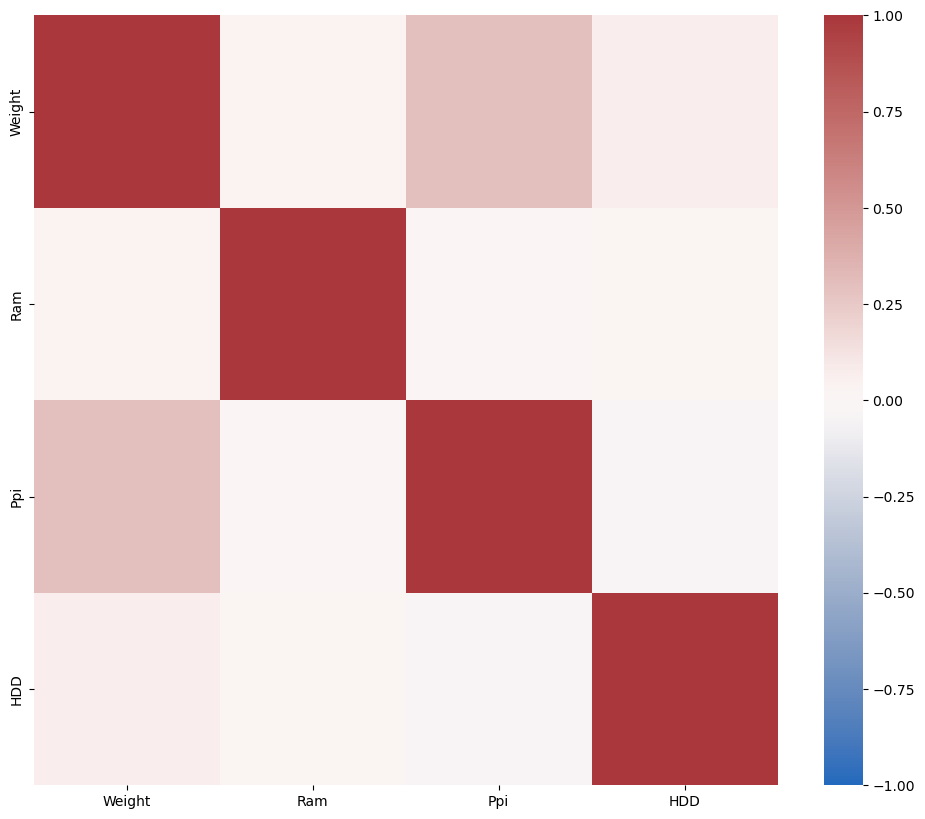

In [54]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

In [55]:
# Calcular el valor mínimo y máximo de cada columna
columnas_numericas = ["Weight","Ppi"]
minimo = df_pcT[columnas_numericas].min()
maximo = df_pcT[columnas_numericas].max()

# Normalizar las columnas
df_pcT[columnas_numericas] = (df_pcT[columnas_numericas] - minimo) / (maximo - minimo)
df_pcT



,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,0.191759,10.084809,0,0,0.031903,Intel Core i3,500.0,0,0.0,Others
1,712,Dell,Notebook,8,0.204437,10.563111,0,0,0.163626,Intel Core i5,1000.0,0,0.0,Others
2,1072,HP,Ultrabook,8,0.090333,11.064804,0,0,0.276809,Intel Core i5,0.0,256,0.0,Windows
3,370,Asus,2 in 1 Convertible,12,0.248811,10.977717,1,0,0.163626,Intel Core i7,2000.0,512,0.5,Windows
4,207,Dell,Ultrabook,8,0.082409,11.550633,1,1,0.777854,Intel Core i7,0.0,256,0.0,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,0.150555,10.893771,0,0,0.215784,Intel Core i5,0.0,256,0.0,Windows
1212,1090,Dell,Notebook,4,0.239303,9.950617,0,0,0.031903,Other Intel Processor,500.0,0,0.0,Others
1213,1125,Lenovo,2 in 1 Convertible,8,0.175911,11.395541,1,1,0.215784,Intel Core i7,0.0,256,0.0,Windows
1214,856,Asus,Notebook,4,0.207607,10.082584,0,0,0.031903,Other Intel Processor,1000.0,0,0.0,Windows


In [56]:
df_pcT["Ppi"].sample(20)

245     0.031903
1084    0.163626
973     0.242549
839     0.242549
372     0.163626
745     0.163626
1017    0.163626
897     0.031903
262     0.242549
754     0.356345
1086    0.215784
1085    0.163626
548     0.050190
628     0.031903
129     0.031903
65      0.163626
703     0.215784
582     0.118779
195     0.069007
575     0.031903
Name: Ppi, dtype: float64

Se tiene que hacer la normalizacion ya que se esta comparando el peso con la compañia para saber si estos valores influyen en el precio.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_pcT[features], df_pcT["Price"], test_size=0.3, random_state=1)

In [58]:
regression = LinearRegression()

In [59]:
regression.fit(X_train, y_train)

LinearRegression()

In [60]:
pd.DataFrame({'columns': features, 'coef': regression.coef_})

,columns,coef
0,Gpu_brand,-0.054302
1,Weight,-0.128463
2,Ram,0.088732
3,Ppi,0.898531
4,HDD,-0.000100


In [61]:
regression.intercept_

10.026255327750615

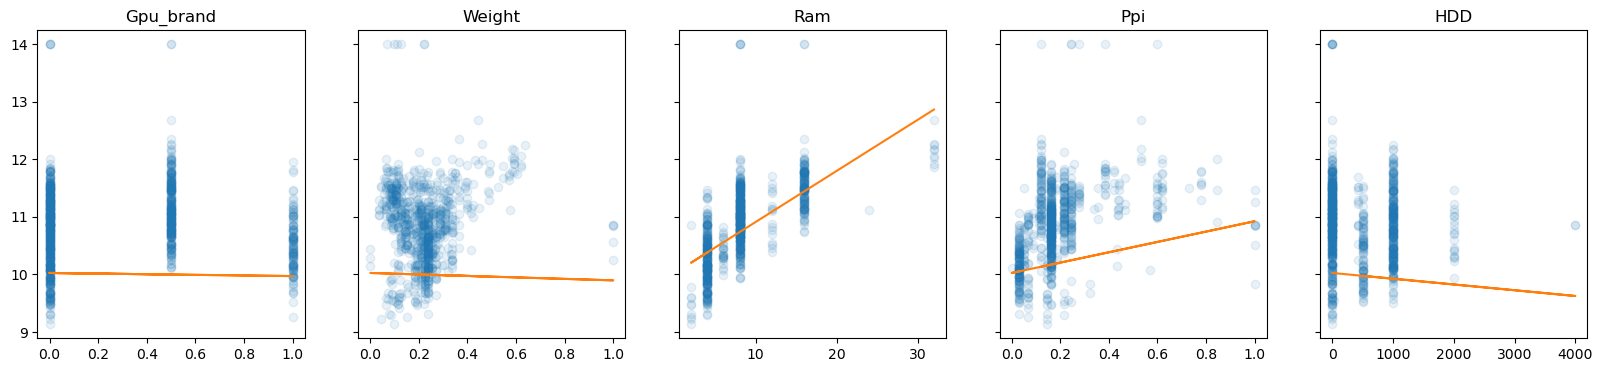

In [62]:
f, axs = plt.subplots(1, len(features), sharey = True, figsize = (20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [63]:
# Crear la pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
    
])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [65]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 0.3408749234032931
Test: 0.35256341723503487

RMSE:
Train: 0.4717089990280424
Test: 0.4947078197683957


### Analisis de error

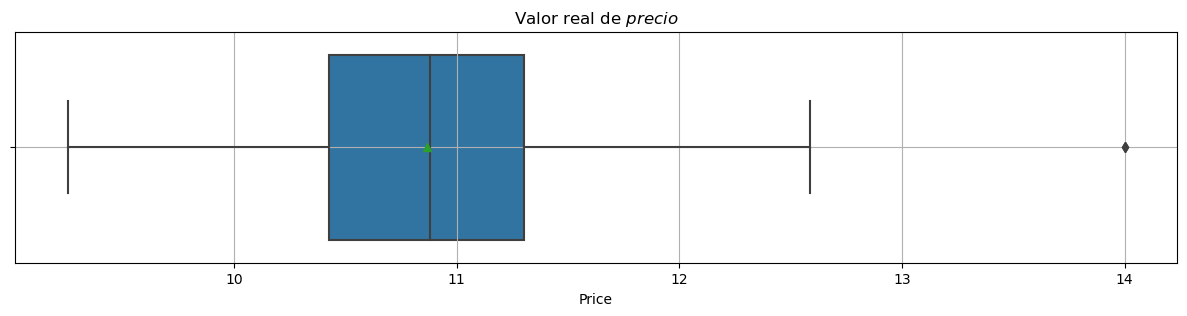

In [66]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = y_test, showmeans = True, orient = 'h')
plt.title('Valor real de $\t{precio}$')
plt.grid()
plt.show()

In [67]:
y_test.describe()

count    363.000000
mean      10.869356
std        0.661791
min        9.253676
25%       10.426796
50%       10.881314
75%       11.304303
max       14.000000
Name: Price, dtype: float64

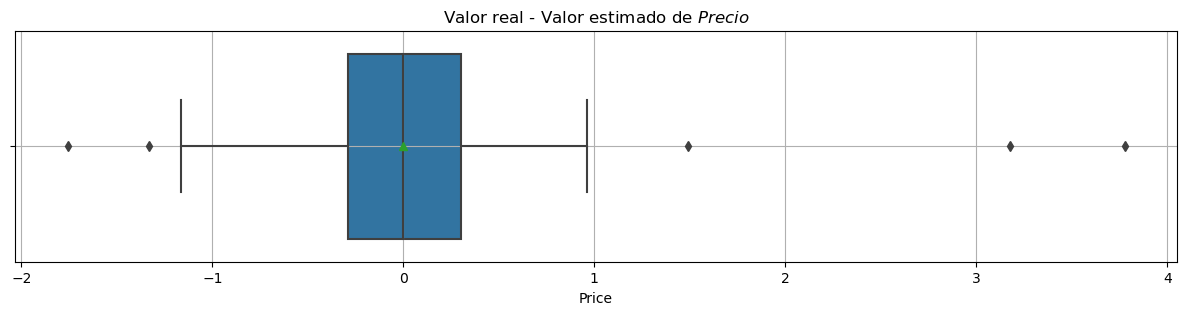

In [68]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = (y_test - regression.predict(X_test)), showmeans = True, orient = 'h')
plt.title('Valor real - Valor estimado de $\t{Precio}$')
plt.grid()
plt.show()

In [69]:
abs(y_test - regression.predict(X_test)).describe()

count    363.000000
mean       0.352563
std        0.347516
min        0.001122
25%        0.138572
50%        0.297654
75%        0.482733
max        3.776268
Name: Price, dtype: float64

# 5. Validacion supuestos de regresion

### 5.1. Colinealidad
Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad (correlación).

C:\Users\Samue\AppData\Local\Temp\ipykernel_16492\3395864857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)


<Axes: >

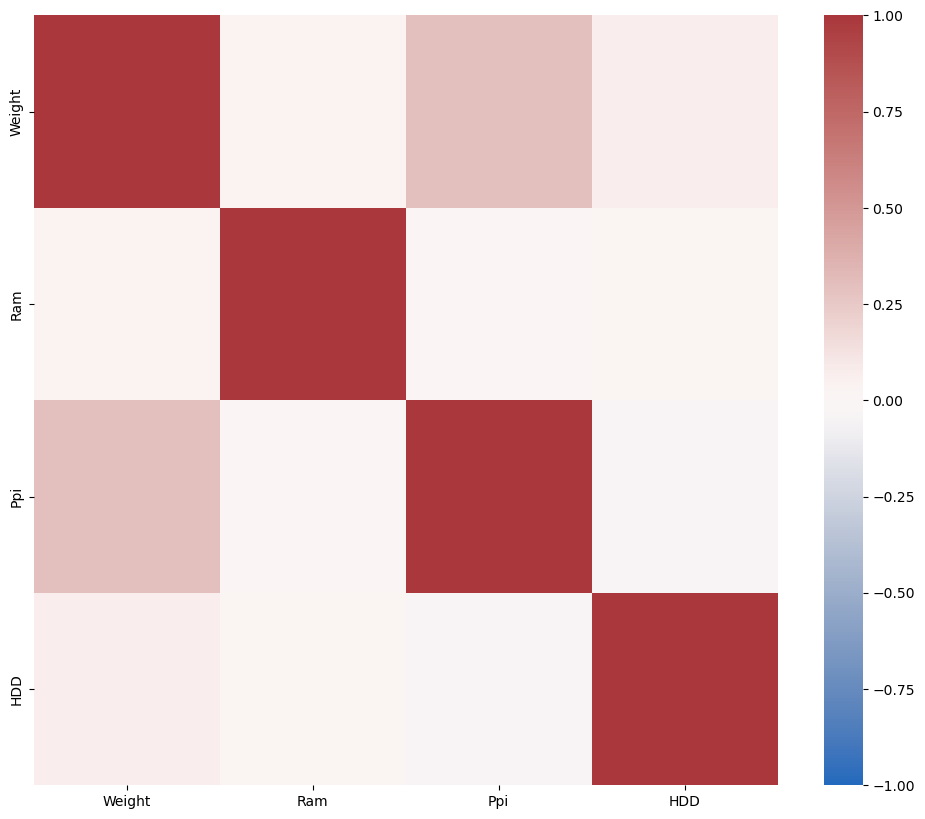

In [70]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_pc[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

In [71]:
X_train[features].corr()

,Gpu_brand,Weight,Ram,Ppi,HDD
Gpu_brand,1.000000,0.385344,0.190268,-0.181805,0.319601
Weight,0.385344,1.000000,0.337718,-0.174170,0.410383
Ram,0.190268,0.337718,1.000000,0.232895,0.096002
Ppi,-0.181805,-0.174170,0.232895,1.000000,-0.246570
HDD,0.319601,0.410383,0.096002,-0.246570,1.000000


Para este caso, se puede evidenciar luego de haber revisado todos los valores de correlacion entre las variables, apartyir de  la recomendacion de eliminar los valores superiores 90 %, se puee llegar a decir que no se debe tocar por ahora nigun valor. En este caso, se puede decir que las variables escogidas, tiene poco nivel de correlacion, es decir, se puede tomar en cuenta, por ahora para el analisis de los valores.  

In [72]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,Gpu_brand,-0.019466
1,Weight,-0.015490
2,Ram,0.417749
3,Ppi,0.143727
4,HDD,-0.053892


Ahora bien, para este caso al no quitar nigun tipo dato o de las variables seleccionadas, no se consiero quese deberia agregar una modificaion a la piepline. Esto , por el razonamiento de colinealdiad, ademas. En este caso, al analizar se puede encontrar varias afirmaciones si se quiere pensar sobre los coeficientes que se estan tomando en este punto. Para este caso, podemo encotrar, lo primero es una pequeña idea de dominancia en cuanto algunos de estos coeficientes. En primer lugar, tenemos la ram, la cual como se ve pude llegar a manejar de mejorar manera los precios segun sus valores unicos. Luego tenemos el mismo caso en menor medida en la columna Ppi. Lo mimos sucede para el caso de la Gpu_brand. Lo mismo para el caso de HDD. Sin embargo, podemos notar primero, que el coeficiente Weigth, se encuentra un poco en desbalanze con respecto al resto. Lo que genera fallas como el caso de Ppi. Luego, el caso mas particular de este analsisi, seria el coeficiente llamado weight. EL cual, como se puede ver, puede generar mucha variedad de resultaods, ademas de ser el mas desbalanceado en cuanto a ser el valor mas insignifictante del modelo.

### 5.2. Linealidad
Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

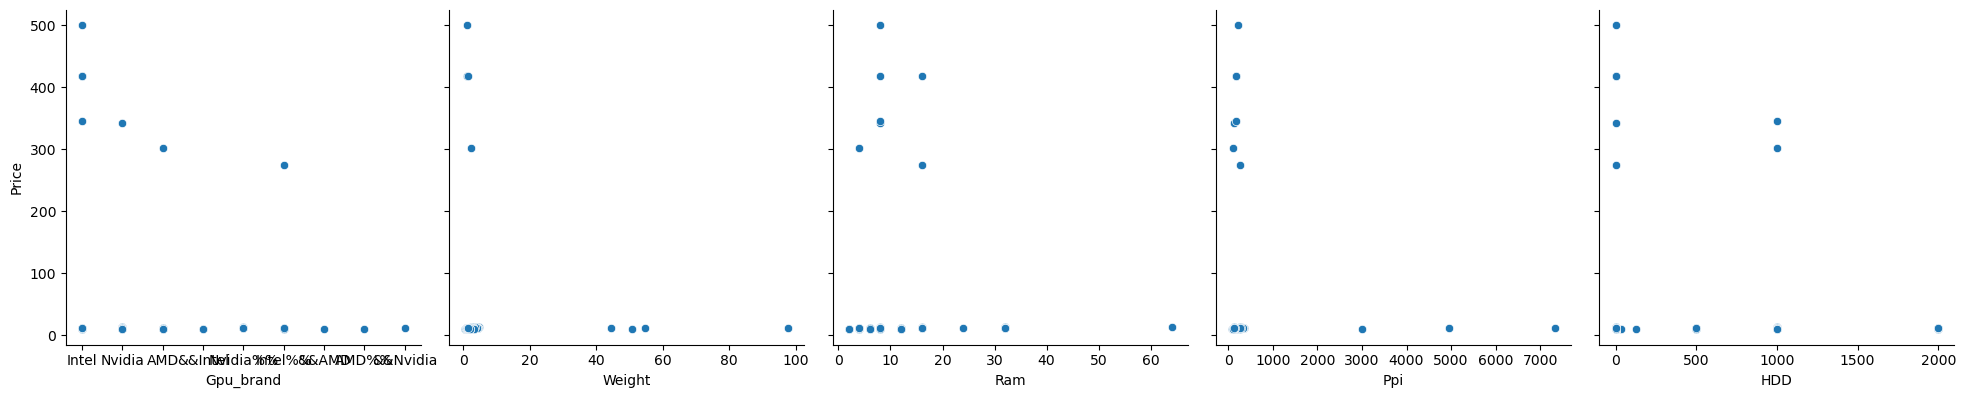

In [73]:
sns.pairplot(df_pc.sample(1000), height = 4, y_vars = 'Price', x_vars = features, kind = 'scatter')

En este caso al analizar la grafica, podemos ver algo que habiamos comentando antes, y es la variedad en cuanto a ddatos resultantes que nso puede llegar soltar cad variable. En este caso, podemos que por ejemplo, el Gpu_brand, el Ram, el HDD. Estas variables generan una variedad mas pequeña de precios, que se podria pensar que es mejor o peor segun el punto de vista, de el analsisi cuantitativos que pueda llegarse a realizar. Luego, para el caso de el weight y el Ppi, se da una caso, de que al tener mas variedad de datos, generanr por cad cada datos una estimacion del datos objetivo, por lo que en este caso serai analizar si estos valores o el otro trio tienen relaciones lineales. 

In [74]:
pipeline = Pipeline(
    [
        
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [75]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [76]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,Gpu_brand,0.205622
1,Weight,-0.061106
2,Ram,0.748099
3,Ppi,0.473929
4,HDD,-0.083745
5,Gpu_brand^2,-0.207137
6,Gpu_brand Weight,-0.004363
7,Gpu_brand Ram,-0.012984
8,Gpu_brand Ppi,-0.062189
9,Gpu_brand HDD,0.055077


In [77]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 0.29430458582710356
Test: 0.30433757898450436

RMSE:
Train: 0.4197835747018232
Test: 0.44774537605991066


Como se peude analizar, en eset caos el error dio un poco mejor. Esto se puede deber a varias razones, siendo una de ellas la aplciacion de la transformacion polinomica. En este caso, se puede ver que los coeficientes originales, quedaron muhco mas balanceados, si se quiere decir, que lo que ya se tenia antes. En este caso, se puede analizar que la Ram sigue siendo el coeficiente mas dominante. Sin embargo, el balanceo , no reemplzao el rodenamiento de los coefcientes, en cuanto a su dominancia a la varaible objetivo. Sin embargo, la transformacion  perimtio que valores que estaban mas disparejos como la GPU_brand, esten mas alienados con el rango de valor de los otros coeficientes 

### 5.3. Normalidad de los errores

In [78]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)


In [79]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [80]:
errors = (pipeline.predict(X_train[features])-y_train).values

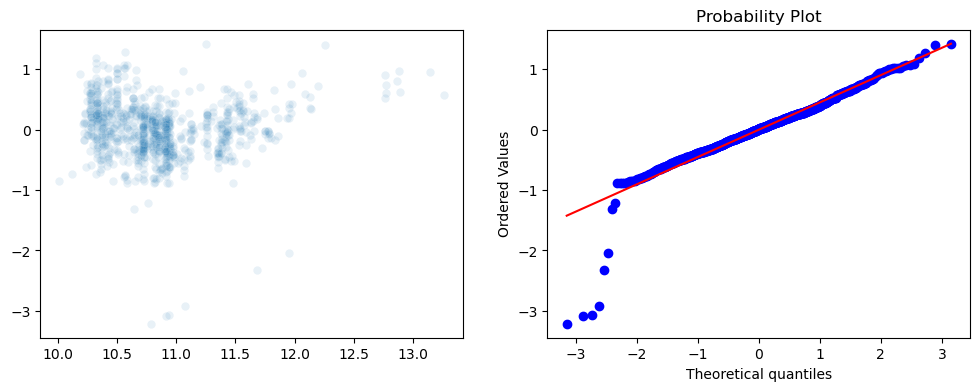

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Como se puede ver en la parte de como esta funcionando el modelo en la parte de subestimacion o sobrestimacion. Pdoemos ver que es un modelo qque se maneja muy equitativamente en ambas partes. Esto quiere decir, que tiende a funcionar de la msima manera cunado estimar por encima del valor a cuando estima por debajo del valor. Esto se puede llegar a solucionar aplicandop un transofrmacion al analisis de los valores atipicos de estas estimaciones, o para lograr mejorar el modelo.

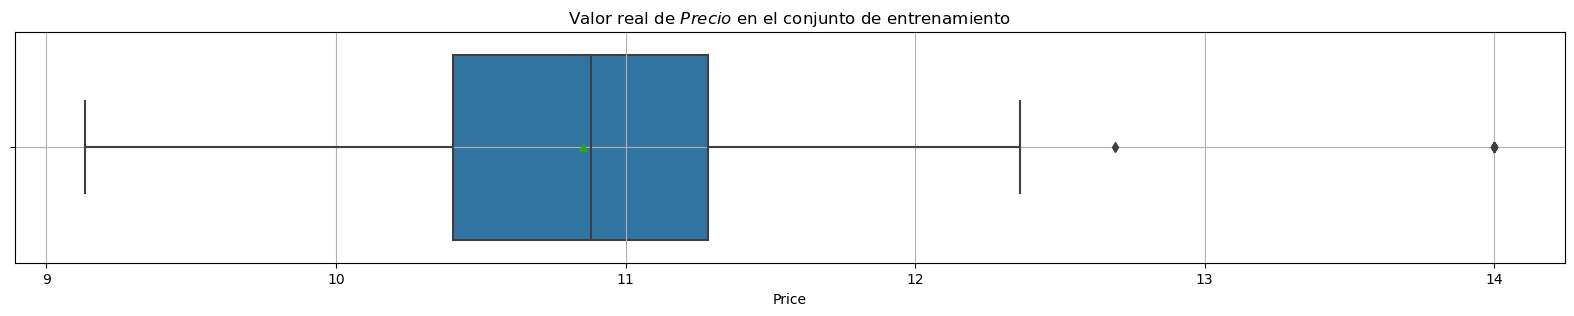

In [82]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Valor real de $\t{Precio}$ en el conjunto de entrenamiento")
plt.grid()
plt.show()

Para lograr quitar estos valores en el caso de las variables de decision qeu se tomo se va utilizar la siguiente funcion, la cual no s permiter identificar y eliminar esos valores $$outlier > Q3 + 1.5*IQR$$

In [83]:
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

12.602090519910487

In [84]:
y_train = y_train.loc[y_train <= threshold]
X_train = X_train.loc[y_train.index]

In [85]:
y_test = y_test.loc[y_test <= threshold]
X_test = X_test.loc[y_test.index]

In [86]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [87]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,Gpu_brand,-0.020795
1,Weight,-0.002657
2,Ram,0.403694
3,Ppi,0.137963
4,HDD,-0.044055


In [88]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 0.3234294241939482
Test: 0.3351854723017015

RMSE:
Train: 0.4084504037613354
Test: 0.4215447934621034


In [89]:
errors = (pipeline.predict(X_train[features])-y_train).values

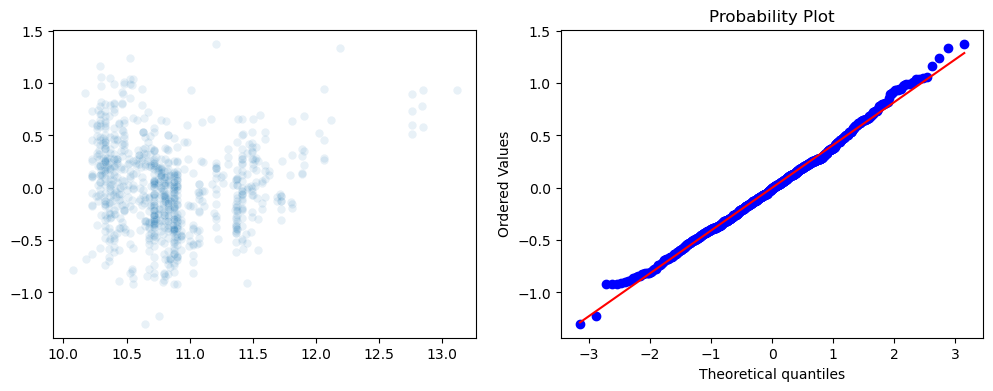

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Como se puede ver luego de haber aplciado la transformacion de los valores atipicios. Se puede llegar a ver una mejeoria en cuanto al RMSE. En este caso, a comparacion de los cambios vistos en lienalidad o colinealidad, este aumento es signitficativo, en cuanto al reduccion del valor del error. Esto se debe a qu el modelo logra con esta trasnformacion manejar los valores atipicos, siendo a un mas efectivo, en las situaciones en dodne fallaba, si se quiere decir

### 5.4. Varianza Constante

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

<Axes: >

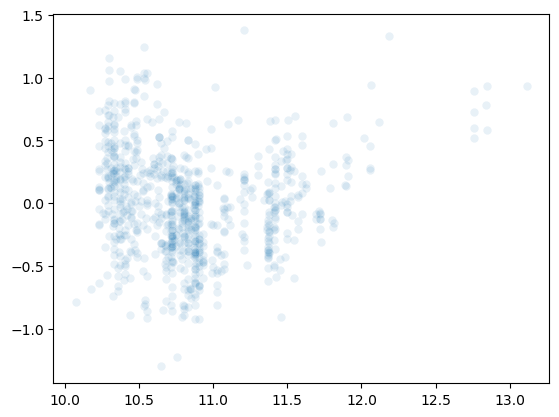

In [91]:
sns.scatterplot(x = pipeline.predict(X_train[features]), y=errors, alpha=0.1)

En este caso, podemos decir que se cumple de cierta manera el critero ya que para varios valores de la variable objetivo, la cantidad de error o los errores se manetiene constante, esto al habalr de su ditricubicion. Como se se sabe en este cao busca mantener la homocedasticidad. Por lo que vemos que cuando se toma una valord elos de la variable objetivo, no es qeu para todos sea igual el erro sino que la dsitribucion dle erro va a ser la misma. 

# 6. Persistencia de Modelo

In [92]:
filename= "tratamientoD.joblib"

In [93]:
dump(pipelineTD,filename)

['tratamientoD.joblib']

In [94]:
filename = "model.joblib"

In [95]:
dump(pipeline, filename)

['model.joblib']

# 7. Predicciones

Ahora vamos a realizar la prediccion de los valores para el excel que no esta completo siguiendo los mimso pasos que se realizaron para ambos casos. En unprimer momento,se va a realizar una transofrmacion a los datos con una primera pipeline. Luego, se va arealizar como tal la prediccion de los datos.

In [96]:
filename= "tratamientoD.joblib"

pipeline_loaded = load(filename)

df_a_predecir=pd.read_csv('./202320_Laboratorio 2 - Regresión_data_laptop_data_test_unlabeled.csv',sep=",", encoding = "ISO-8859-1")

df_transformado = pipeline_loaded.transform(df_a_predecir)

Para este punto ahora vamso a predecir los valores de precio en una nueva columna en el excel que se llama CalculatedPrice

In [97]:
filename = "model.joblib"

pipeline_loaded = load(filename)

df_transformado['CalculatedPrice'] = pipeline_loaded.predict(df_transformado[features])

Ahora vamos a crear el archivo de predicciones csv, que al final resulta siendo la manera de persisitir este resultado para su respectiva evaluacion. Cabe aclarar que los preciso calculados se encuientran en  la columna CalculatedPrice del archivo csv

In [98]:
df_transformado.to_csv('ArchivodePredicciones.csv')

##### Este archivo de predicciones se encuentra adjunto al notebook, a la presentacion y al tablero de control en los archivos que se enviaron

# 8. Recomendaciones

Recopilación de Datos Completa y Precisa: Asegurarse de que la recopilación de datos sea completa y precisa. La calidad de los datos es fundamental para la construcción de modelos precisos

Validación Continua del Modelo: Una vez construido el modelo, establecer un proceso de validación continua para asegurarse de que siga siendo preciso a medida que cambian las tendencias del mercado y las especificaciones técnicas de los productos.

Colaboración Interdepartamental: Fomentar la colaboración entre los equipos de tecnología, ventas y análisis de datos. Esto puede ayudar a integrar el modelo en las estrategias de precios y promociones de la empresa de manera más efectiva.

Exploración de Datos Detallada: Antes de construir un modelo de regresión, realizar una exploración exhaustiva de los datos. Esto incluye la identificación de valores atípicos, la comprensión de la distribución de las variables y la búsqueda de relaciones significativas entre las especificaciones técnicas y los precios.

Interpretación del Modelo: Comprender las implicaciones de las características técnicas en el precio de los productos. Esto puede ayudar a tomar decisiones más informadas sobre qué características promocionar o ajustar para aumentar la competitividad.

Monitoreo de Competidores: Mantenerse al tanto de las estrategias de precios de la competencia. Esto puede proporcionar información valiosa para ajustar sus propias estrategias y mantenerse competitivos en el mercado.

Limpieza de Datos: Abordar cualquier problema de calidad de datos, como valores nulos o duplicados, antes de entrenar el modelo. La limpieza de datos es esencial para obtener resultados confiables.

Actualización Regular: Dado que el mercado de tecnología cambia rápidamente, considerar la posibilidad de actualizar y mejorar el modelo de regresión de forma regular para que siga siendo relevante y preciso con el tiempo.